# Partie 3 : Analyse du champ Summary

In [1]:
import pandas as pd
import numpy as np
import spacy
from PIL import Image
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [8]:
dataset = pd.read_csv('./src/airplane_crashes_clean.csv', encoding='utf-8')

In [9]:
summary = dataset.loc[:, 'Summary']
summary

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
4993    The plane was chartered to carry a team of six...
4994    Before approach, the pilot requested a change ...
4995    The air taxi crashed in heavy rain while attem...
4996    The air taxi crashed into a heavy wooded area ...
4997    A business jet operating as an air ambulance, ...
Name: Summary, Length: 4998, dtype: object

## Import Spacy

In [ ]:
# !python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [52]:
nlp.max_length = 1069463

## Nettoyage du texte

### Strip

Nous retirons les espaces en début et fin de texte.

In [13]:
summary_df = summary.to_frame()

In [15]:
summary_df['summary_striped'] = summary_df['Summary'].apply(lambda x: x.strip() if x == x else x)

### Regex

In [18]:
import re

summary_df['summary_clean'] = summary_df['summary_striped'].apply(lambda x : re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", x).lower() if x == x else x)

On rassemble tous les champs dans une variable nommée corpus.

In [45]:
summary_clean = summary_df.loc[:, 'summary_clean']

In [49]:
corpus = ''
for i, val in summary_clean.items():
    if val == val: 
        corpus += val
    else:
        i += 1

In [50]:
len(corpus)

1069462

In [53]:
doc = nlp(corpus)

### Stop-words

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

# Visualiser les 10 premiers stop-words :
for i, word in enumerate(STOP_WORDS):
    if i < 10:
        print(word)
    else:
        break

she
down
indeed
meanwhile
onto
them
for
twenty
above
top


### Lemma

Nous ne conservons que la racine des mots.

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
import wordcloud

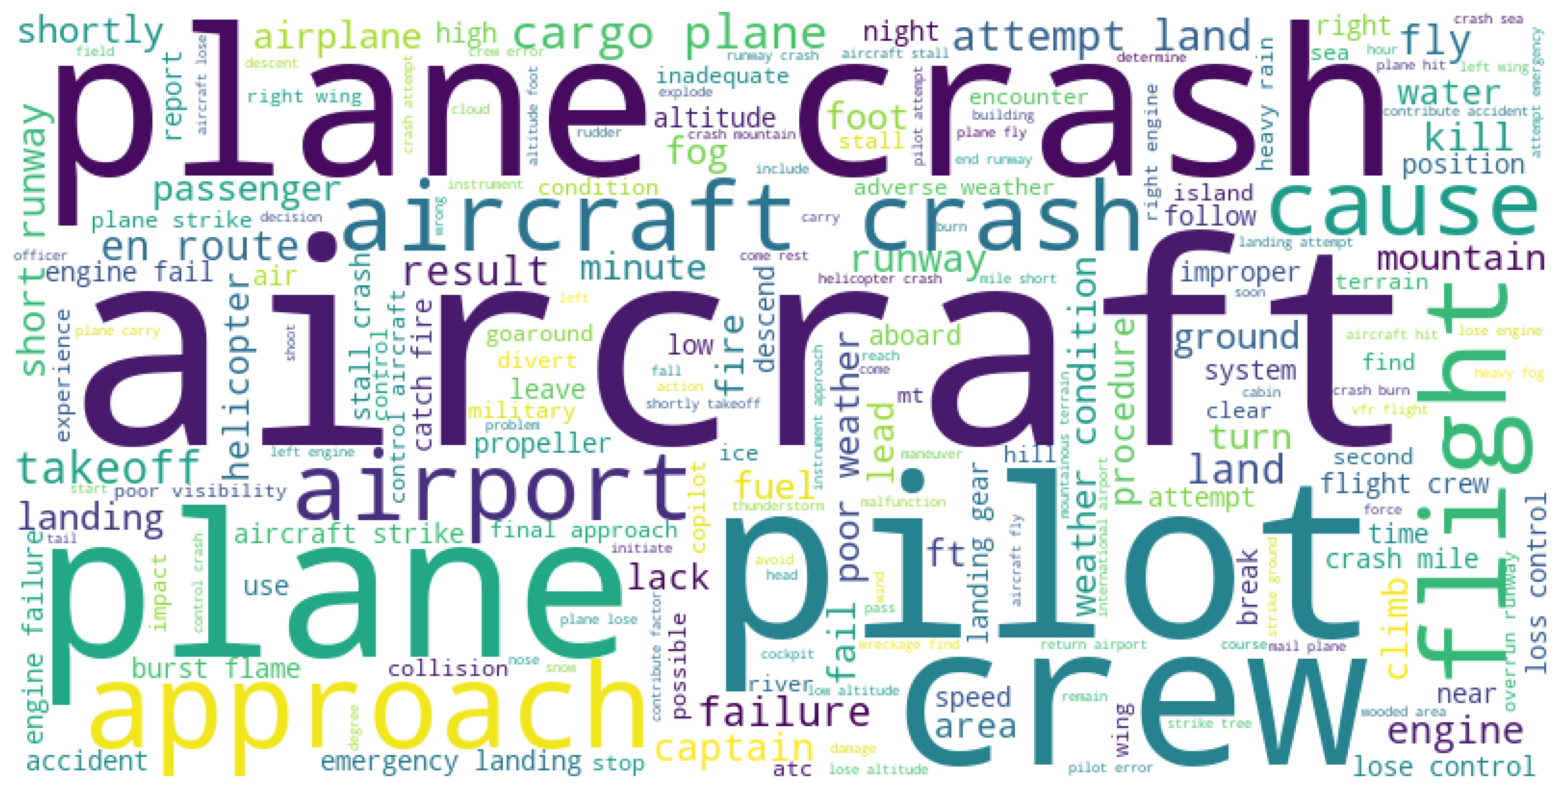

In [80]:
# Créer un lemma:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS] # on lemmatize seulement les mots qui ne sont pas des stopwords

# Créer un nouveau corpus:
corpus_lemma = " ".join(lemma) # on obtient nos mots lemmatizés qu'on transforme en string

# Créer un wordcloud:
wd = wordcloud.WordCloud(background_color = 'white',
                         contour_width = 1,
                         contour_color = 'steelblue',
                         stopwords = STOP_WORDS,
                         width=800, height=400)

# Générer le nuage de mots:
cloud = wd.generate(corpus_lemma)

# Visualiser le nuage de mots:
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Stop-words additionnels

Le nuage de mots met en lumière le champ lexical de l'aviation : airplane, aircraft, plane, flight, etc.

Nous excluons ces mots afin de faire ressortir d'autres thèmes et mots-clés.

In [74]:
aviation_words = ['airplane', 'aircraft', 'plane', 'flight', 'crash', 'pilot', 'crew']
stop_words_enriched = list(STOP_WORDS) + aviation_words

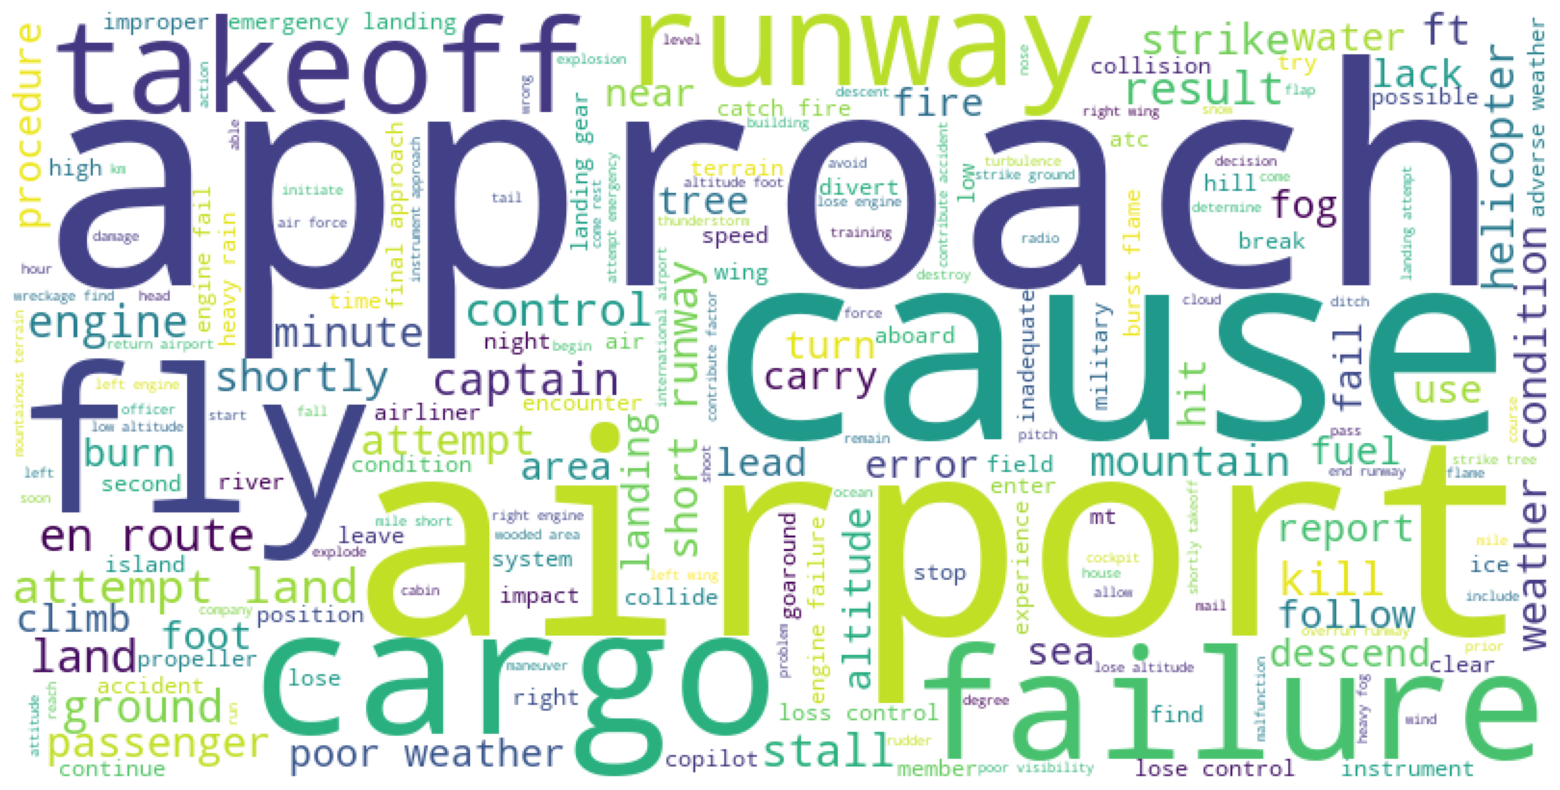

In [ ]:
# Créer un wordcloud:
wd = wordcloud.WordCloud(background_color = 'white',
                         contour_width = 1,
                         contour_color = 'steelblue',
                         stopwords = stop_words_enriched,
                         width=800, height=400)

# Générer le nuage de mots:
cloud = wd.generate(corpus_lemma)

# Visualiser le nuage de mots:
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Vol commerciaux

Nous nous intéressons ici uniquement aux vols non militaires.

In [83]:
civil_crashes = dataset[(dataset['Military']=='No') & (dataset['Postal_Cargo']=='No')]

In [92]:
summary = civil_crashes.loc[:, 'Summary']
len(summary)

3743

In [85]:
summary_df = summary.to_frame()

In [86]:
summary_df['summary_striped'] = summary_df['Summary'].apply(lambda x: x.strip() if x == x else x)

In [87]:
summary_df['summary_clean'] = summary_df['summary_striped'].apply(lambda x : re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", x).lower() if x == x else x)

In [88]:
summary_clean = summary_df.loc[:, 'summary_clean']

In [89]:
corpus = ''
for i, val in summary_clean.items():
    if val == val: 
        corpus += val
    else:
        i += 1

In [90]:
doc = nlp(corpus)

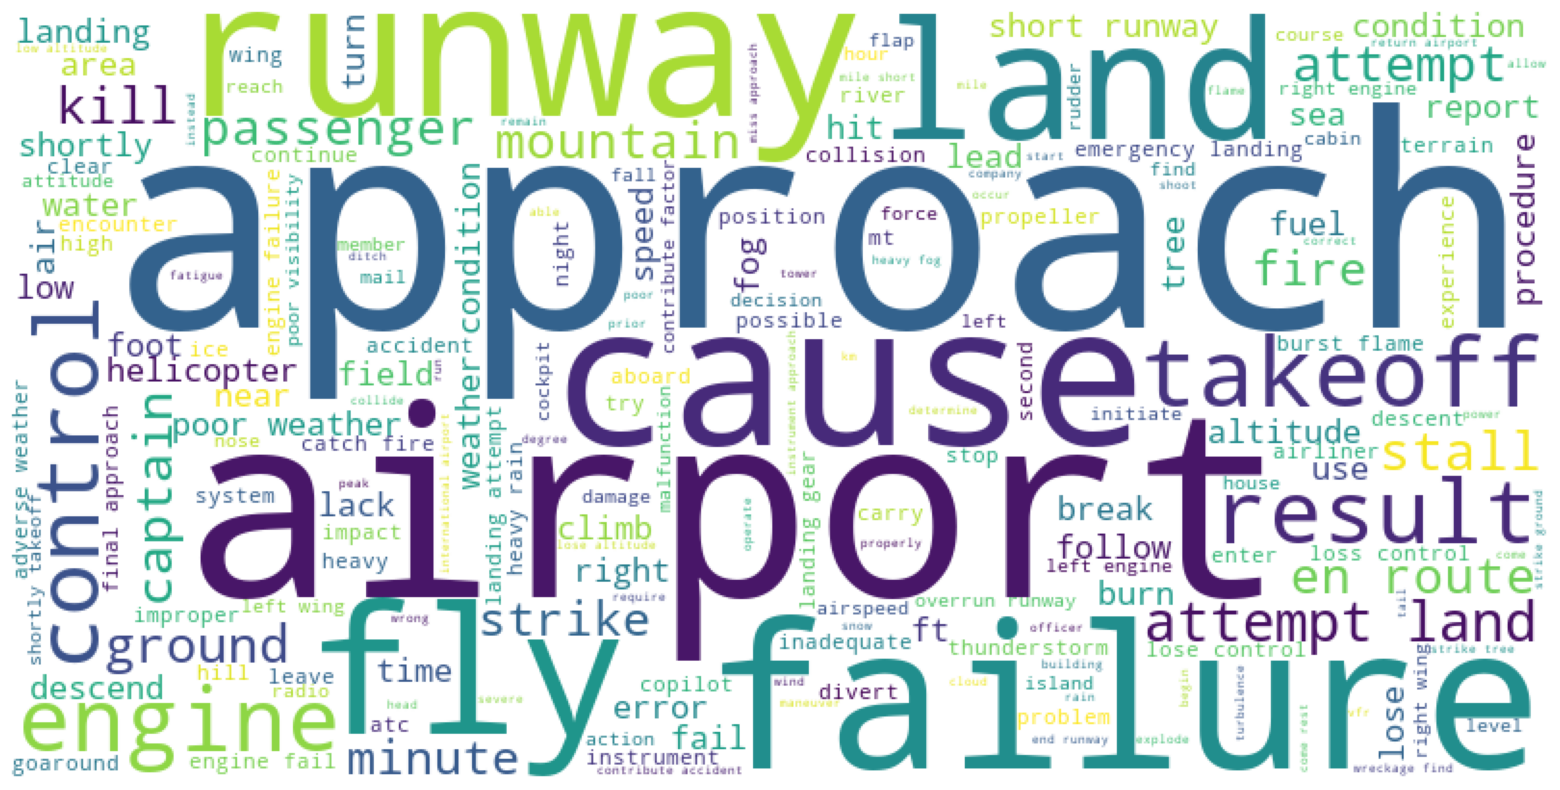

In [98]:
# Créer un lemma:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS] # on lemmatize seulement les mots qui ne sont pas des stopwords

# Créer un nouveau corpus:
corpus_lemma = " ".join(lemma) # on obtient nos mots lemmatizés qu'on transforme en string

# Créer un wordcloud:
wd = wordcloud.WordCloud(background_color = 'white',
                         contour_width = 1,
                         contour_color = 'steelblue',
                         stopwords = stop_words_enriched,
                         width=800, height=400)

# Générer le nuage de mots:
cloud = wd.generate(corpus_lemma)

# Visualiser le nuage de mots:
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()